![](https://www.thesparksfoundationsingapore.org/images/logo_small.png)

# task4

>create the Decision Tree classifier and visualize it graphically.

![](https://image.slidesharecdn.com/decisiontrees-180322142751/95/decision-trees-1-638.jpg?cb=1521728932)

In [1]:
# Data analysis libraries
import pandas as pd
import numpy as np

# Data visualization libraires
import seaborn as sns
import matplotlib.pyplot as plt

# show plot in the notebook
%matplotlib inline

# remove errors
import warnings
warnings.filterwarnings("ignore")

In [2]:
#load data
iris=pd.read_csv('iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.drop(['Id','Species'], axis=1).describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
# Check the response variable frequency
iris['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

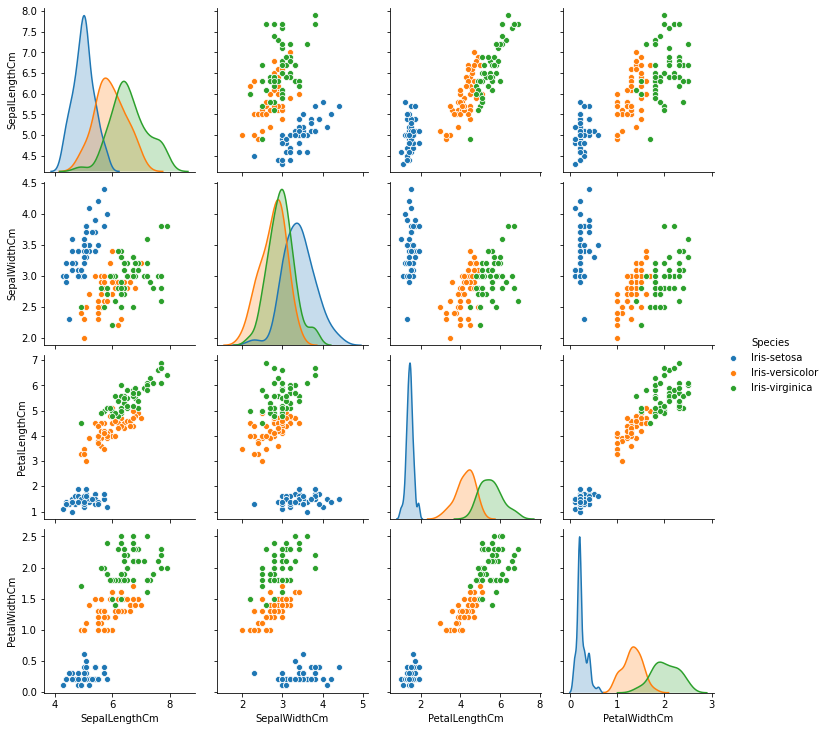

In [5]:
# Create a pairplot of the data set. Which flower species seems to be the most separable?
sns.pairplot(iris.drop(['Id'], axis=1),hue='Species')
# Iris setosa seems most separable from the other two species

Text(0, 0.5, 'Sepal Width Cm')

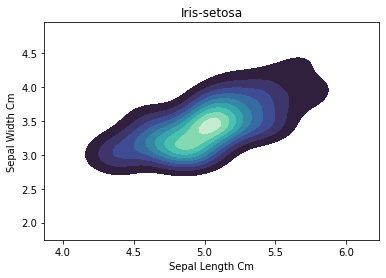

In [6]:
# Create a kde plot of sepal_length versus sepal width for setosa species of flower.
sub=iris[iris['Species']=='Iris-setosa']

sns.kdeplot(
    data=sub[['SepalLengthCm','SepalWidthCm']],
    cmap="mako", shade=True, shade_lowest=False)

plt.title('Iris-setosa')
plt.xlabel('Sepal Length Cm')
plt.ylabel('Sepal Width Cm')

Text(0, 0.5, 'Petal Width Cm')

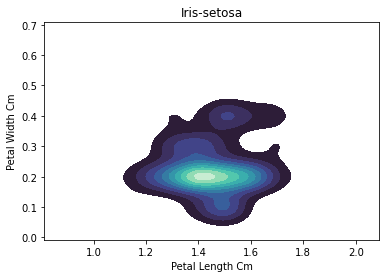

In [7]:
sns.kdeplot(data=sub[['PetalLengthCm','PetalWidthCm']],cmap="mako", shade=True, shade_lowest=False)
plt.title('Iris-setosa')
plt.xlabel('Petal Length Cm')
plt.ylabel('Petal Width Cm')

In [8]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

X = iris.drop(['Id','Species'],axis=1)
y = iris['Species']

clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X, y)

In [9]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_2 <= 2.45
|   |--- class: Iris-setosa
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: Iris-virginica
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_0 <= 6.95
|   |   |   |   |   |--- class: Iris-versicolor
|   |   |   |   |--- feature_0 >  6.95
|   |   |   |   |   |--- class: Iris-virginica
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: Iris-versicolor
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: Iris-virginica



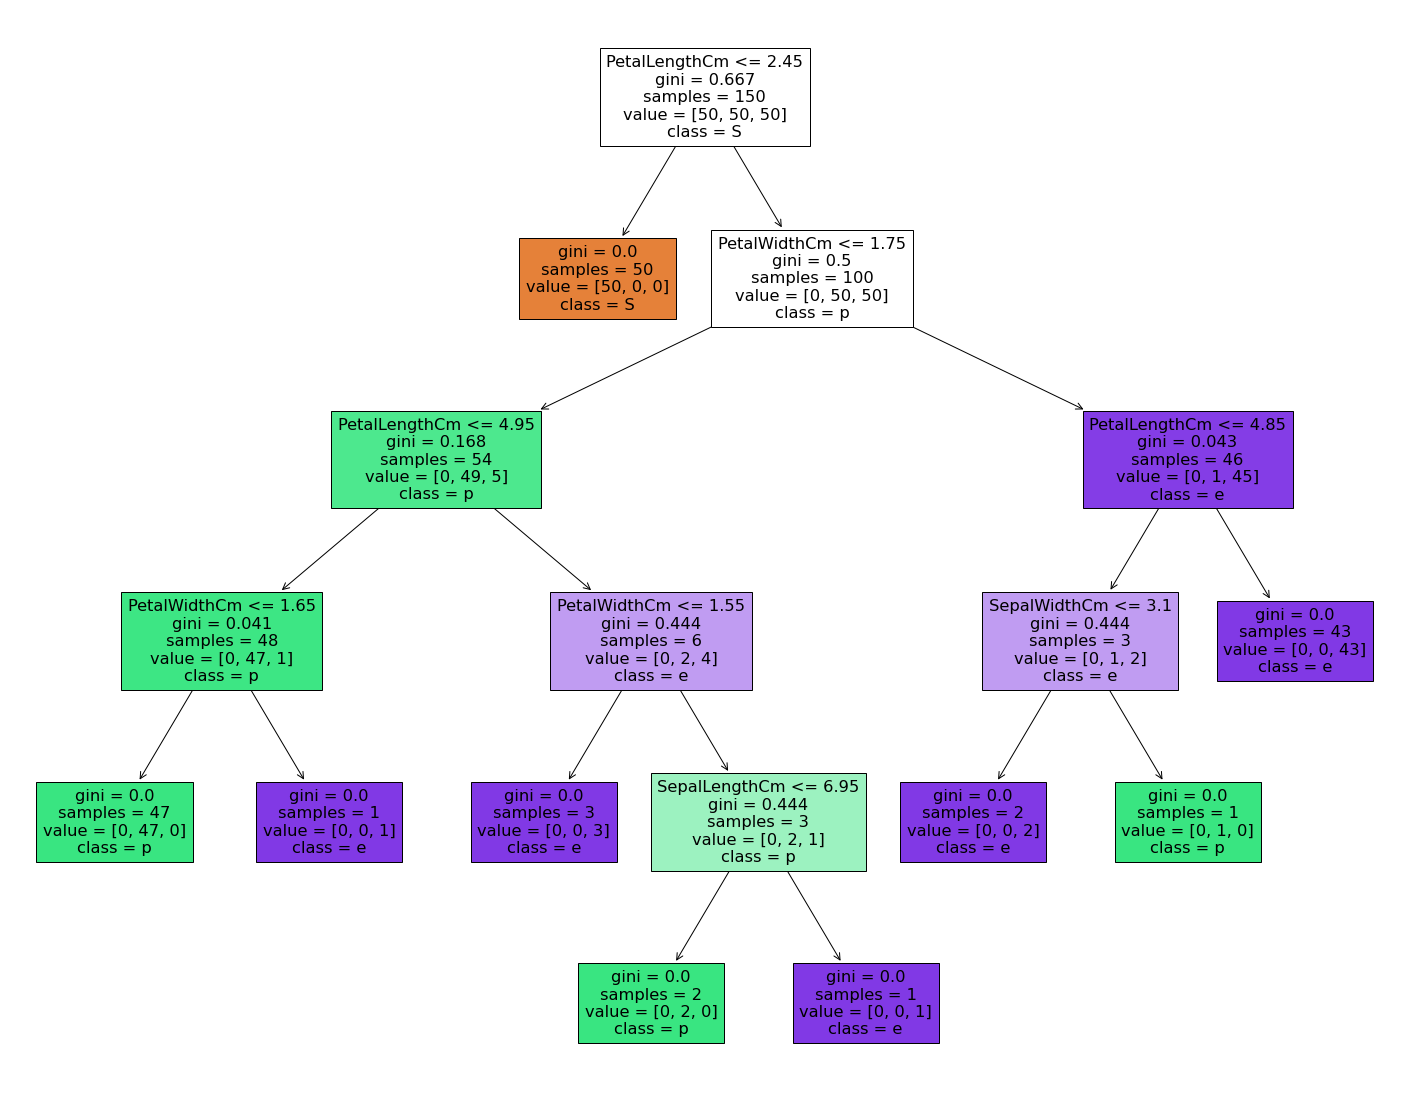

In [10]:
feature_names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
target_names='Species'
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=feature_names,  
                   class_names=target_names,
                   filled=True)

> # Made By Soham Mukherjee